<a href="https://colab.research.google.com/github/Aniruddha5164/ML-project/blob/main/ML_Project_Aniruddha_Banerjee.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

Github Link- https://github.com/Aniruddha5164/ML-project

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

**Importing Modules**



In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import StackingRegressor

%matplotlib inline

**looading the dataset**

In [2]:
#let's mount the google drive for import the dtaset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/SeoulBikeData.csv', encoding= 'unicode_escape')

In [4]:
# Viewing the data of top 5 rows
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [5]:
# View the data of bottom 5 rows
df.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [6]:
#Getting the shape of dataset with rows and columns
print(df.shape)


(8760, 14)


In [7]:
#check details about the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [8]:
#Looking for the description of the dataset
df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [9]:
#Getting all the columns
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

there are 14 columns

In [10]:
# finding total no of rows in dataset
print("The no of rows in the dataset is ",len(df))

The no of rows in the dataset is  8760


# **preprocessing the dataset**


**Checking for null values**

In [11]:
#count of missing values in each column.
df.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

that there is no null values is our data.

**checking duplicate values**

In [12]:
# Checking Duplicate Values
duplicates =len(df[df.duplicated()])
print(duplicates)

0


there are no duplicate values


**convert the "date" column into 3 different columns i.e "year","month","day"**

In [13]:
import datetime as dt
df['date'] = df['Date'].apply(lambda x: dt.datetime.strptime(x,"%d/%m/%Y"))

In [14]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

df['day'] = df['date'].dt.day_name()


In [15]:
#creating a new column of "weekdays_weekend" and drop the column "Date","day","year"
df['week']=df['day'].apply(lambda x : "weekend" if x=='Saturday' or x=='Sunday' else "weekday" )


In [16]:
# checking no of years
df['week'].value_counts()

weekday    6264
weekend    2496
Name: week, dtype: int64

In [17]:
df=df.drop(columns=['date','day','year'],axis=1)

In [18]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,month,week
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,weekday
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,weekday
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,12,weekday
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,weekday
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,weekday


So I convert the "date" column into 3 different column i.e "year","month","day".
The "year" column in our data set is basically contain the 2 unique number contains the details of from 2017 december to 2018 november so if i consider this is a one year then we don't need the "year" column so we drop it.
The other column "day", it contains the details about the each day of the month, for our relevence we don't need each day of each month data but we need the data about, if a day is a weekday or a weekend so we convert it into this format and drop the "day" column.

In [19]:
#Change the int64 column into catagory column
cols=['Hour','month','week']
for col in cols:
  df[col]=df[col].astype('category')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Date                       8760 non-null   object  
 1   Rented Bike Count          8760 non-null   int64   
 2   Hour                       8760 non-null   category
 3   Temperature(°C)            8760 non-null   float64 
 4   Humidity(%)                8760 non-null   int64   
 5   Wind speed (m/s)           8760 non-null   float64 
 6   Visibility (10m)           8760 non-null   int64   
 7   Dew point temperature(°C)  8760 non-null   float64 
 8   Solar Radiation (MJ/m2)    8760 non-null   float64 
 9   Rainfall(mm)               8760 non-null   float64 
 10  Snowfall (cm)              8760 non-null   float64 
 11  Seasons                    8760 non-null   object  
 12  Holiday                    8760 non-null   object  
 13  Functioning Day            8760 n

<ipython-input-21-965d721b7f65>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


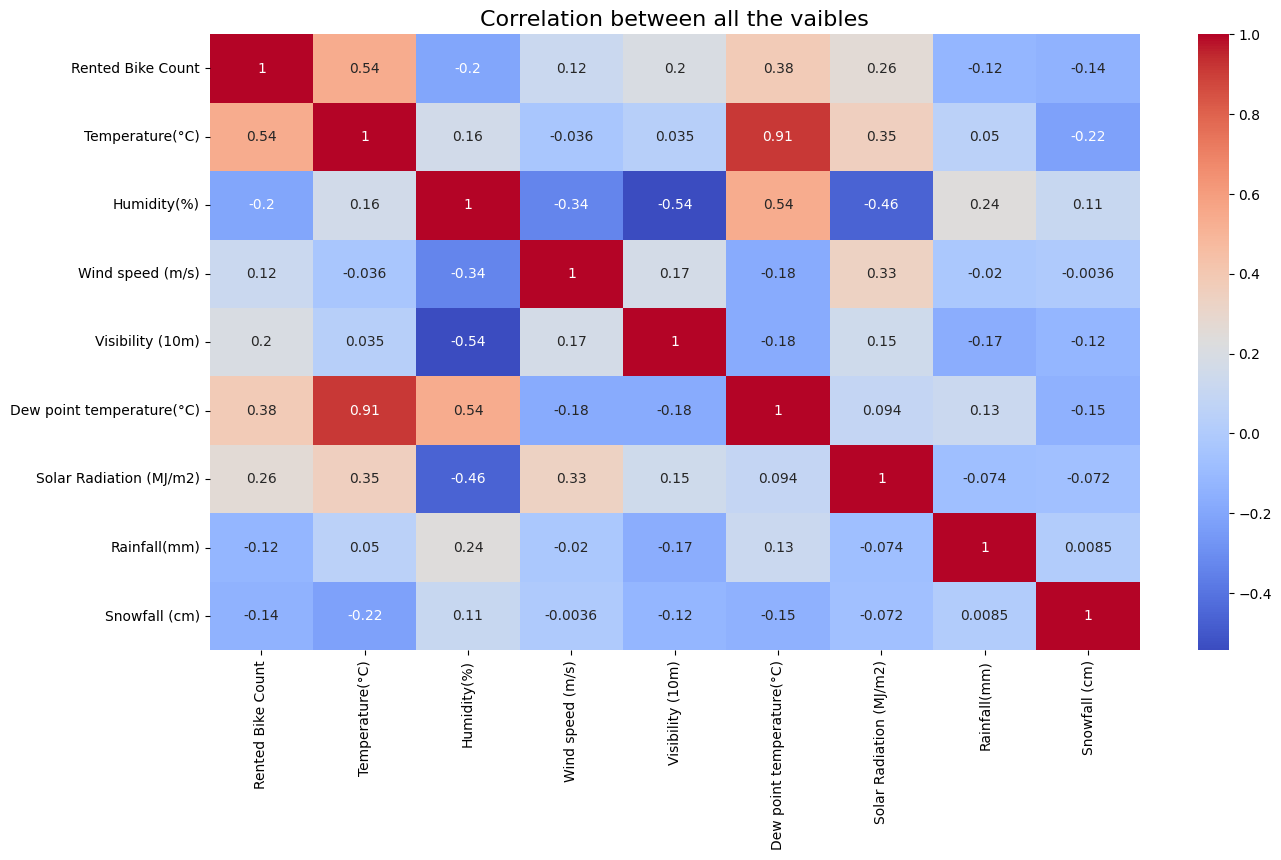

In [21]:
#Heatmap for co-relation in features
plt.figure(figsize=(15, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation between all the vaibles', size=16)
plt.show()

From the above experiment i can conclude that Temperature and Dew point temperature(°C) has the high correlation . we drop this column then it dont affects the outcome of our analysis

In [22]:
df.drop(columns= ['Dew point temperature(°C)'], inplace=True)

# removing outliers

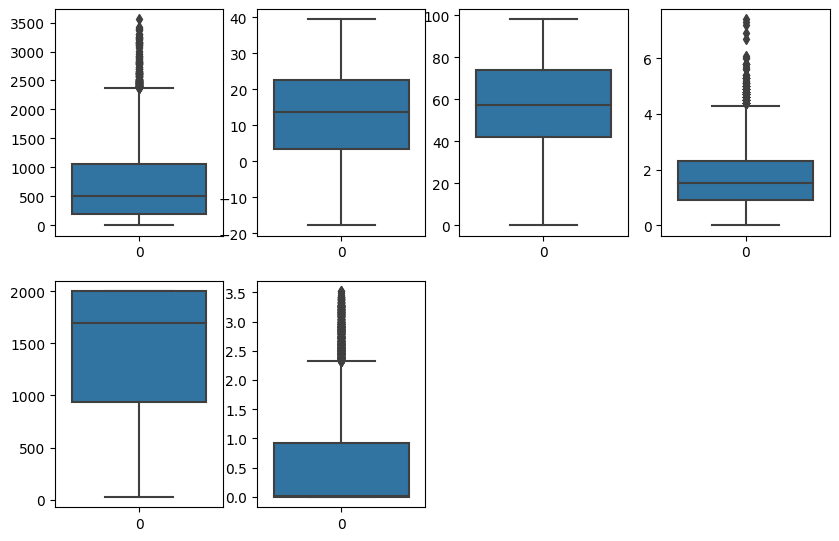

In [23]:
# looking for outliers using box plot
plt.figure(figsize=(10,10))
for index,item in enumerate([i for i in df.describe().columns.to_list() if i not in ['Rainfall(mm)','Snowfall (cm)']]):
  plt.subplot(3,4,index+1)
  sns.boxplot(df[item])

In [24]:
# finding the inter-quartile range

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Rented Bike Count           874.25
Temperature(°C)              19.00
Humidity(%)                  32.00
Wind speed (m/s)              1.40
Visibility (10m)           1060.00
Solar Radiation (MJ/m2)       0.93
Rainfall(mm)                  0.00
Snowfall (cm)                 0.00
dtype: float64


<ipython-input-24-8843117abcf8>:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = df.quantile(0.25)
<ipython-input-24-8843117abcf8>:4: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = df.quantile(0.75)


In [25]:
# listing features to remove outliers

features = list(df.columns)
features = features[2:]
list_0 = ['Hour','Seasons','Holiday','Functioning Day','month','year','week']
new_features = [x for x in features if x not in list_0]

In [26]:
new_features

['Temperature(°C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)']

In [27]:
# removing outliers

df[new_features] = df[new_features][~((df[new_features] < (Q1 - 1.5 * IQR)) |(df[new_features] > (Q3 + 1.5 * IQR))).any(axis=1)]

<ipython-input-27-c5f08b4fac2d>:3: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df[new_features] = df[new_features][~((df[new_features] < (Q1 - 1.5 * IQR)) |(df[new_features] > (Q3 + 1.5 * IQR))).any(axis=1)]
<ipython-input-27-c5f08b4fac2d>:3: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df[new_features] = df[new_features][~((df[new_features] < (Q1 - 1.5 * IQR)) |(df[new_features] > (Q3 + 1.5 * IQR))).any(axis=1)]


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Date                     8760 non-null   object  
 1   Rented Bike Count        8760 non-null   int64   
 2   Hour                     8760 non-null   category
 3   Temperature(°C)          7078 non-null   float64 
 4   Humidity(%)              7078 non-null   float64 
 5   Wind speed (m/s)         7078 non-null   float64 
 6   Visibility (10m)         7078 non-null   float64 
 7   Solar Radiation (MJ/m2)  7078 non-null   float64 
 8   Rainfall(mm)             7078 non-null   float64 
 9   Snowfall (cm)            7078 non-null   float64 
 10  Seasons                  8760 non-null   object  
 11  Holiday                  8760 non-null   object  
 12  Functioning Day          8760 non-null   object  
 13  month                    8760 non-null   category
 14  week    

# handling Null values

In [29]:
# filling null values with mean values

df['Temperature(°C)'] = df['Temperature(°C)'].fillna(df['Temperature(°C)'].mean())
df['Humidity(%)'] = df['Humidity(%)'].fillna(df['Humidity(%)'].mean())
df['Wind speed (m/s)'] = df['Wind speed (m/s)'].fillna(df['Wind speed (m/s)'].mean())
df['Visibility (10m)'] = df['Visibility (10m)'].fillna(df['Visibility (10m)'].mean())

df['Solar Radiation (MJ/m2)'] = df['Solar Radiation (MJ/m2)'].fillna(df['Solar Radiation (MJ/m2)'].mean())
df['Rainfall(mm)'] = df['Rainfall(mm)'].fillna(df['Rainfall(mm)'].mean())
df['Snowfall (cm)'] = df['Snowfall (cm)'].fillna(df['Snowfall (cm)'].mean())

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Date                     8760 non-null   object  
 1   Rented Bike Count        8760 non-null   int64   
 2   Hour                     8760 non-null   category
 3   Temperature(°C)          8760 non-null   float64 
 4   Humidity(%)              8760 non-null   float64 
 5   Wind speed (m/s)         8760 non-null   float64 
 6   Visibility (10m)         8760 non-null   float64 
 7   Solar Radiation (MJ/m2)  8760 non-null   float64 
 8   Rainfall(mm)             8760 non-null   float64 
 9   Snowfall (cm)            8760 non-null   float64 
 10  Seasons                  8760 non-null   object  
 11  Holiday                  8760 non-null   object  
 12  Functioning Day          8760 non-null   object  
 13  month                    8760 non-null   category
 14  week    

<ipython-input-31-965d721b7f65>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


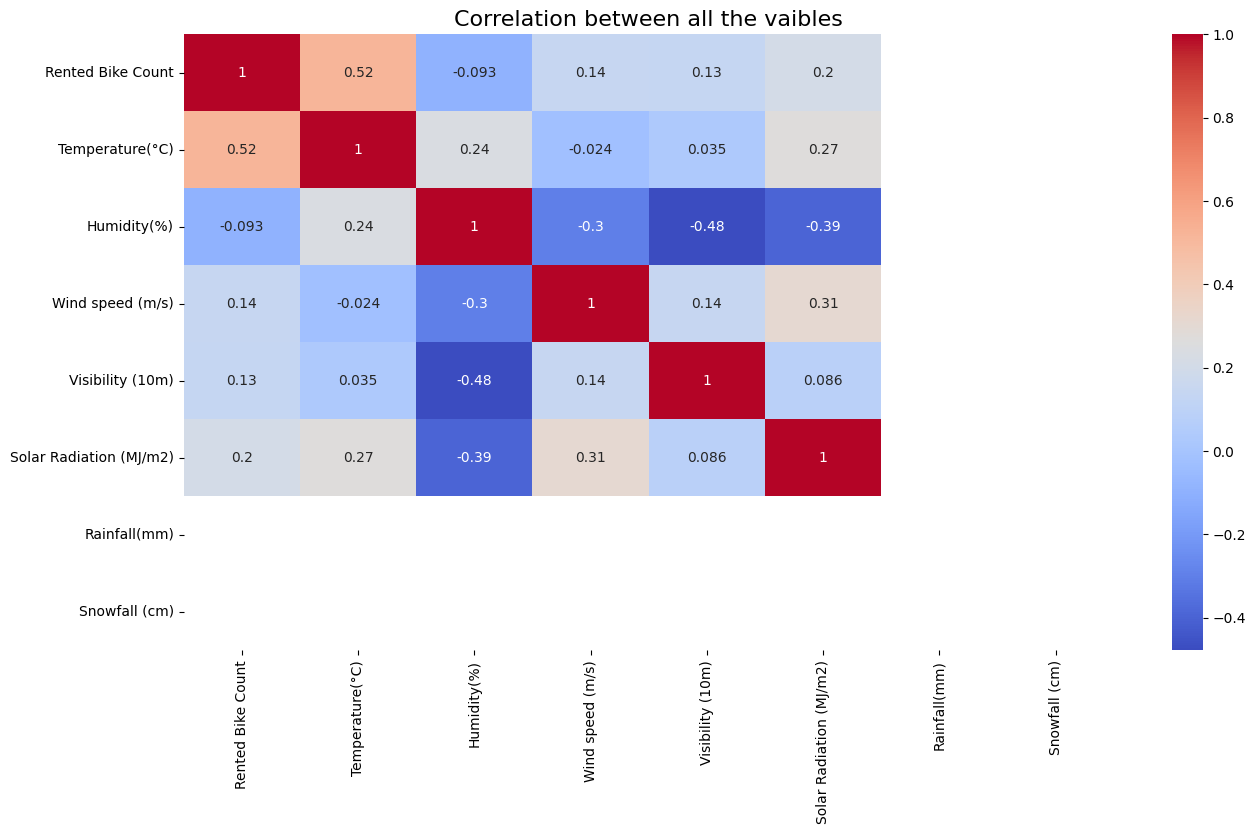

In [31]:
#Heatmap for co-relation in features
plt.figure(figsize=(15, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation between all the vaibles', size=16)
plt.show()

# performing EDA

**categorical variables**

**Month**




[Text(0.5, 1.0, 'Count of Rented bikes acording to Month ')]

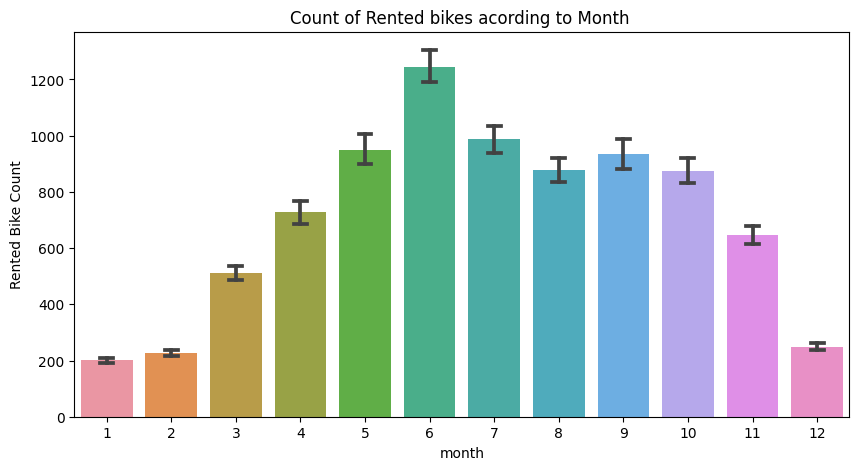

In [32]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(10,5))
sns.barplot(data=df,x='month',y='Rented Bike Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to Month ')

From the above bar plot we can clearly say that from the month 5 to 10 the demand of the rented bike is high as compare to other months

**week**

[Text(0.5, 1.0, 'Count of Rented bikes acording to weekdays_weekenday ')]

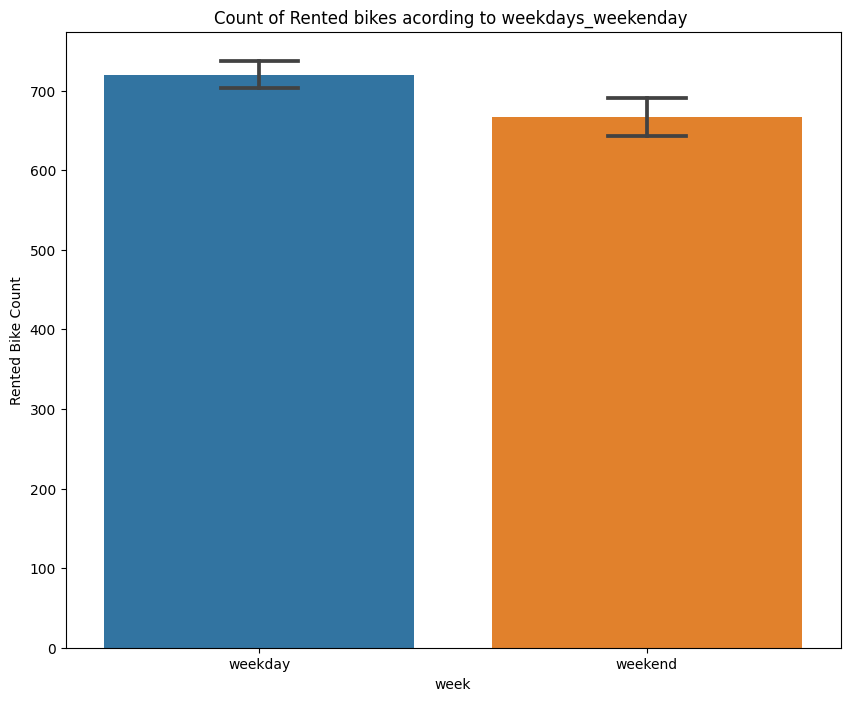

In [33]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(10,8))
sns.barplot(data=df,x='week',y='Rented Bike Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to weekdays_weekenday ')

[Text(0.5, 1.0, 'Count of Rented bikes acording to weekdays_weekend ')]

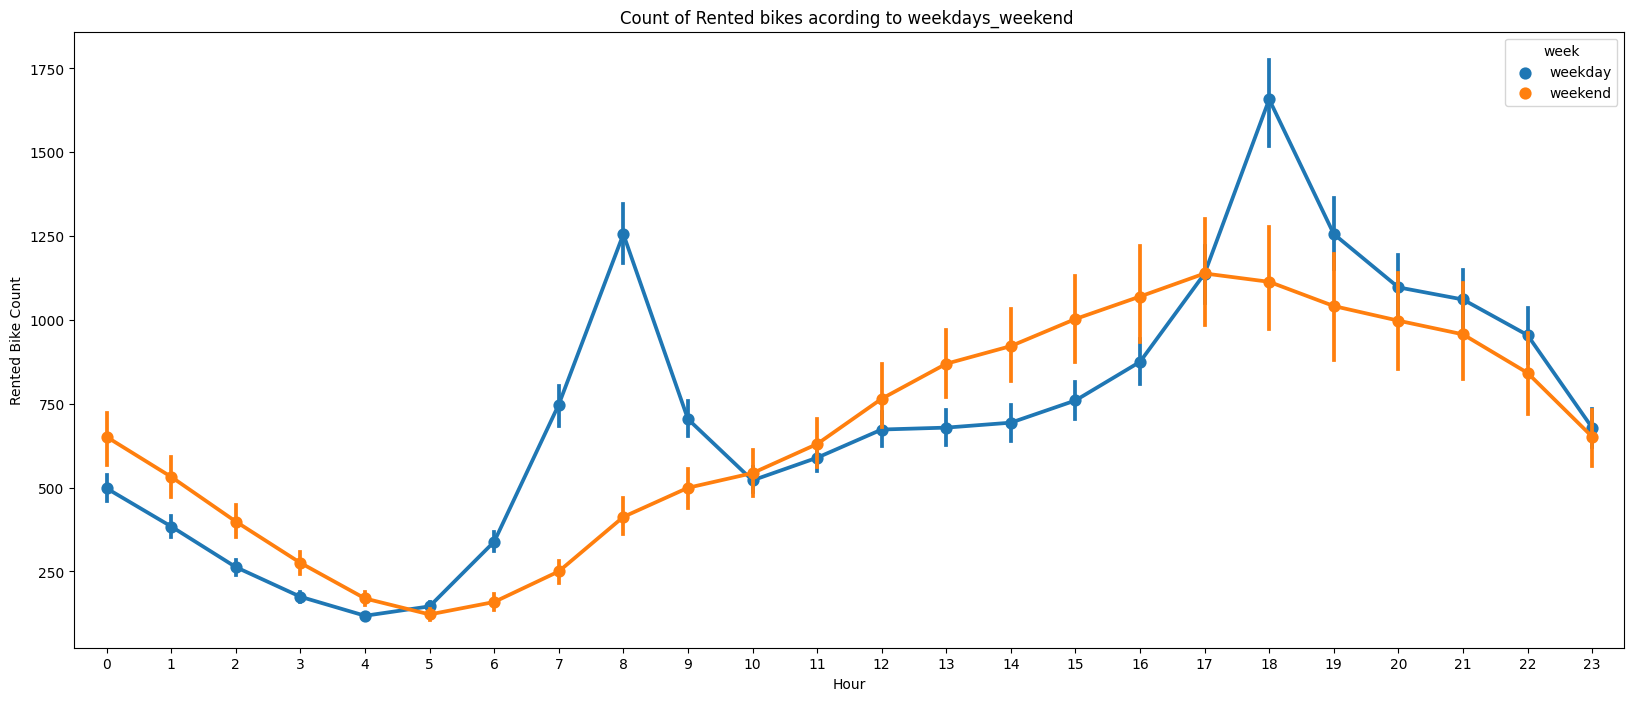

In [34]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(20,8))
sns.pointplot(data=df,x='Hour',y='Rented Bike Count',hue='week',ax=ax)
ax.set(title='Count of Rented bikes acording to weekdays_weekend ')

From the above point plot and bar plot we can say that in the week days which represent in blue colur show that the demand of the bike higher because of the office. Peak Time are 7 am to 9 am and 5 pm to 7 pm The orange colur represent the weekend days, and it show that the demand of rented bikes are very low specially in the morning hour but when the evening start from 4 pm to 8 pm the demand slightly increases

**Functioning day**

[Text(0.5, 1.0, 'Count of Rented bikes acording to Functioning Day ')]

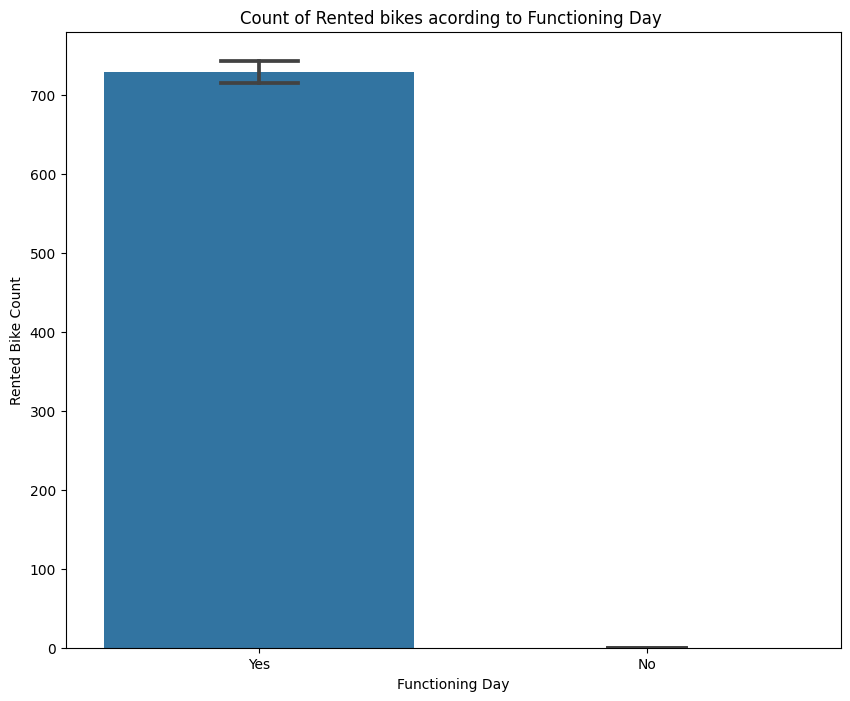

In [35]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(10,8))
sns.barplot(data=df,x='Functioning Day',y='Rented Bike Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to Functioning Day ')

[Text(0.5, 1.0, 'Count of Rented bikes acording to Functioning Day ')]

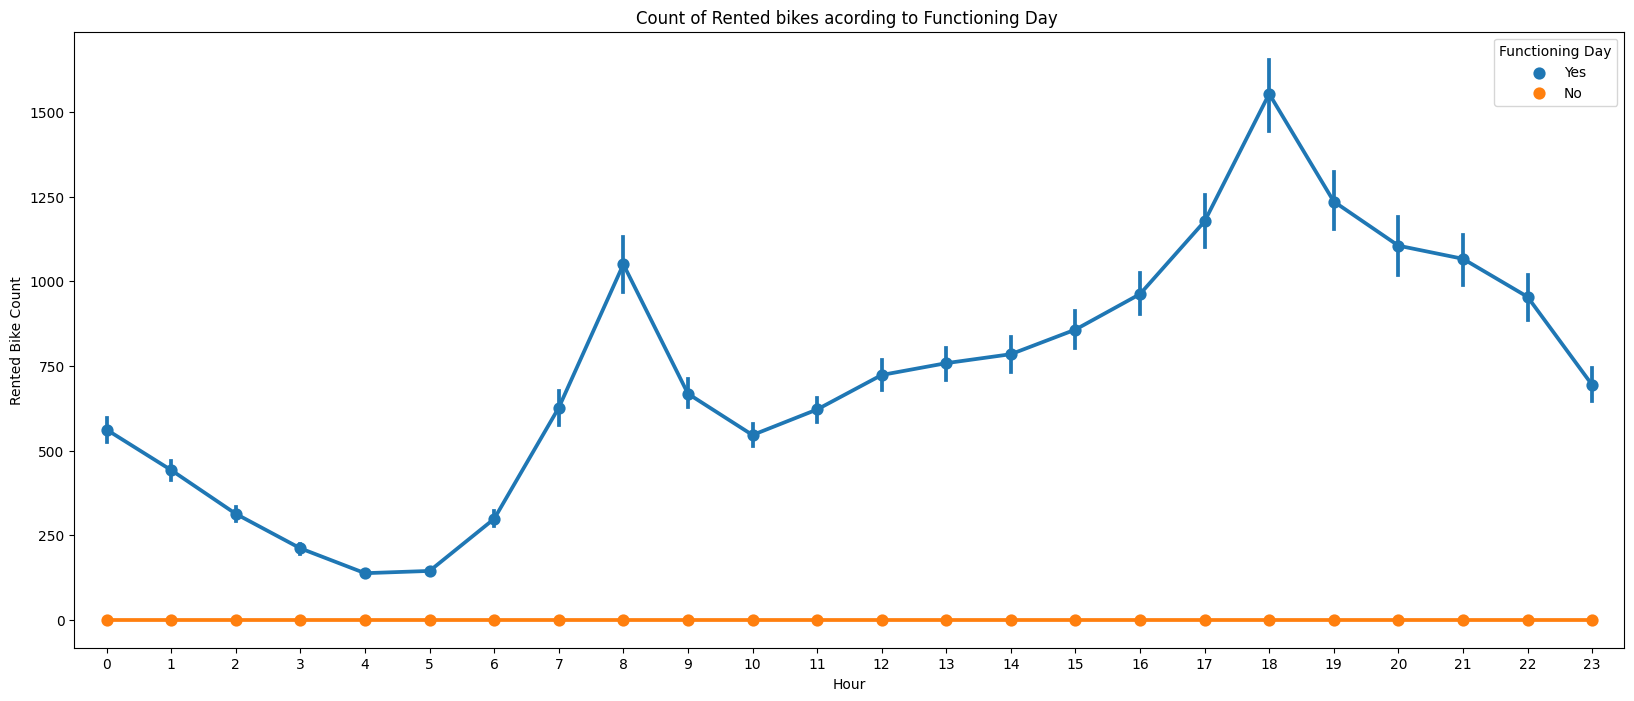

In [36]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(20,8))
sns.pointplot(data=df,x='Hour',y='Rented Bike Count',hue='Functioning Day',ax=ax)
ax.set(title='Count of Rented bikes acording to Functioning Day ')

In the above bar plot and point plot which shows the use of rented bike in functioning day or not, and it clearly shows that,
Peoples dont use reneted bikes in no functioning day

**seasons**

[Text(0.5, 1.0, 'Count of Rented bikes acording to Seasons ')]

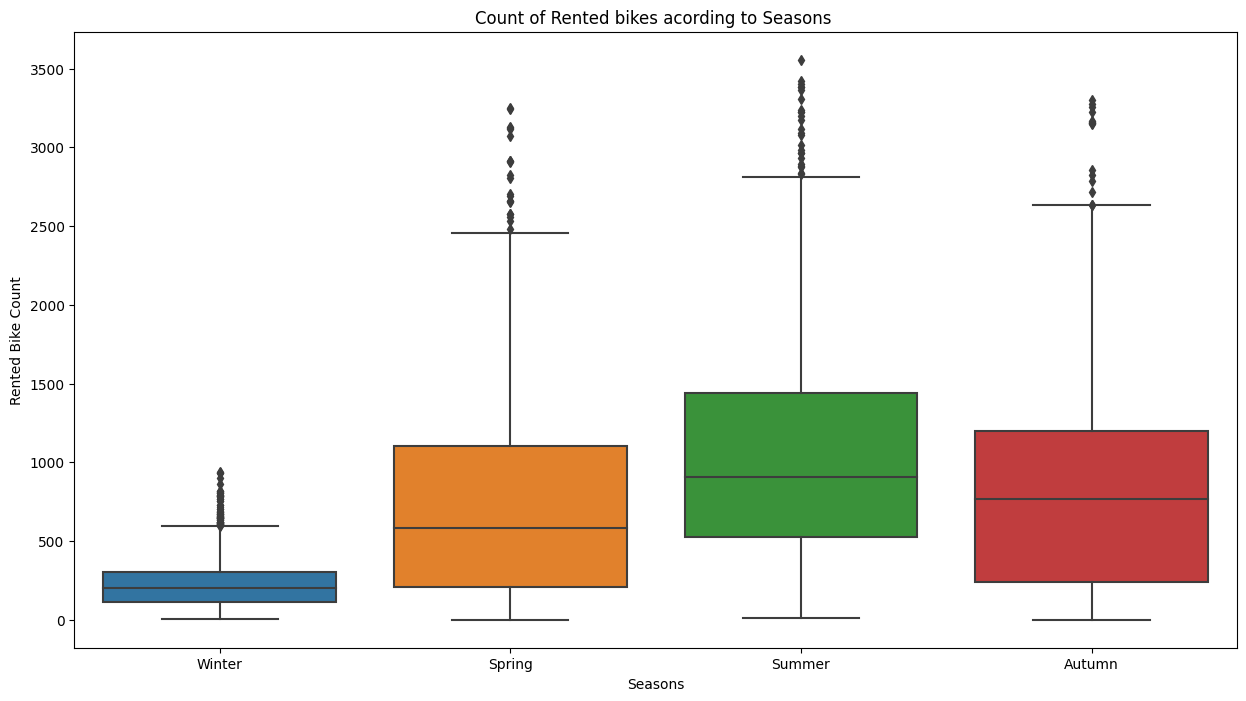

In [37]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(15,8))
sns.boxplot(data=df,x='Seasons',y='Rented Bike Count',ax=ax)
ax.set(title='Count of Rented bikes acording to Seasons ')

[Text(0.5, 1.0, 'Count of Rented bikes acording to Seasons ')]

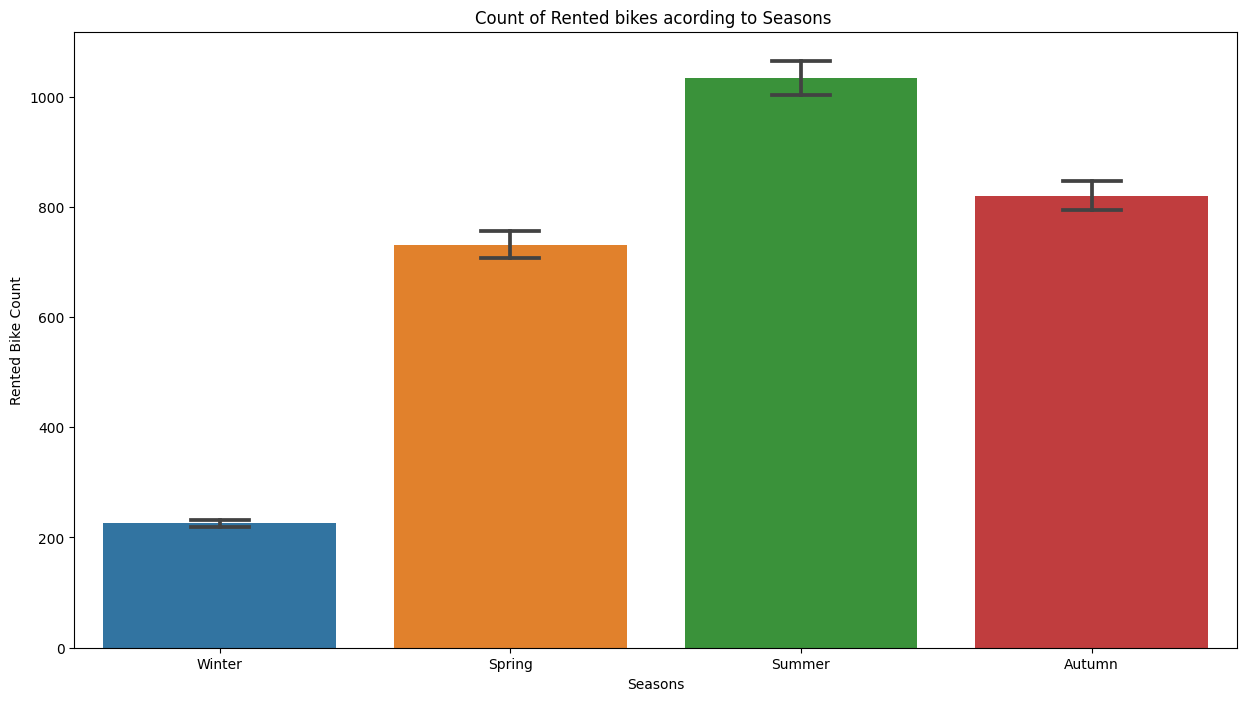

In [38]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(15,8))
sns.barplot(data=df,x='Seasons',y='Rented Bike Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to Seasons ')

In the above box plot and bar plot which shows the use of rented bike in in four different seasons, and it clearly shows that,
In summer season the use of rented bike is high
In winter season the use of rented bike is very low because of snowfall.

**Holiday**

<ipython-input-39-a0bcbcb15a32>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Holiday').sum()['Rented Bike Count'].plot.pie(radius=1)


<Axes: ylabel='Rented Bike Count'>

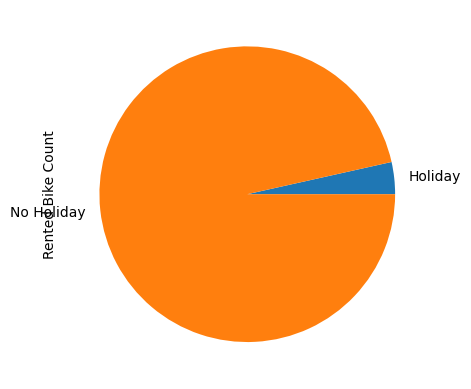

In [39]:
df.groupby('Holiday').sum()['Rented Bike Count'].plot.pie(radius=1)

[Text(0.5, 1.0, 'Count of Rented bikes acording to Holiday ')]

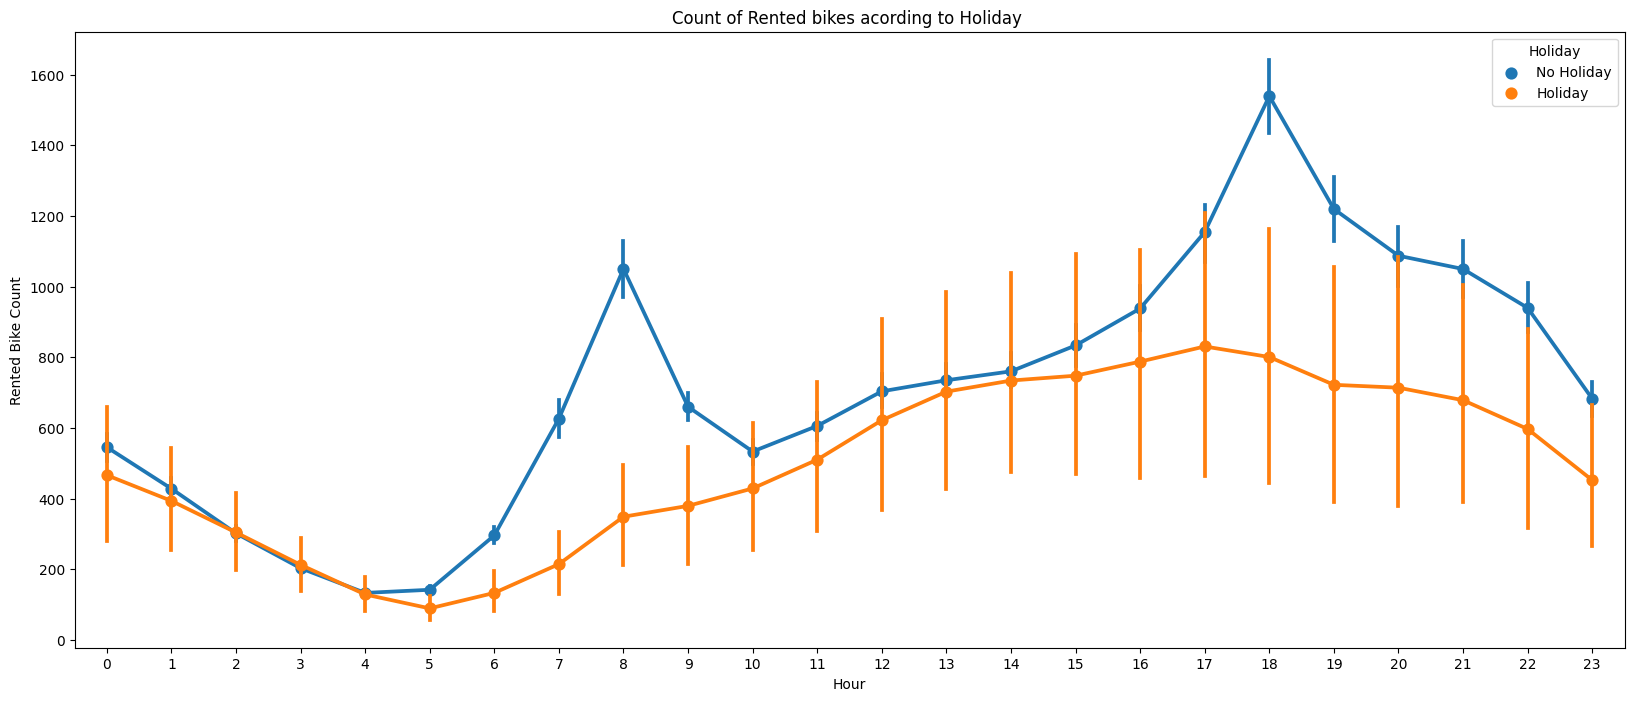

In [40]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(20,8))
sns.pointplot(data=df,x='Hour',y='Rented Bike Count',hue='Holiday',ax=ax)
ax.set(title='Count of Rented bikes acording to Holiday ')

In the above pie plot and point plot which shows the use of rented bike in a holiday, and it clearly shows that,
plot shows that in holiday people uses the rented bike from 2pm-8pm

**Analysis of numerical variables**

In [41]:
numerical_columns=['Rented Bike Count','Temperature(°C)','Humidity(%)',	'Wind speed (m/s)',	'Visibility (10m)',	'Solar Radiation (MJ/m2)'	,'Rainfall(mm)'	,'Snowfall (cm)']

<ipython-input-42-a8d4f0c04f43>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[item])
<ipython-input-42-a8d4f0c04f43>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[item])
<ipython-input-42-a8d4f0c04f43>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seabo

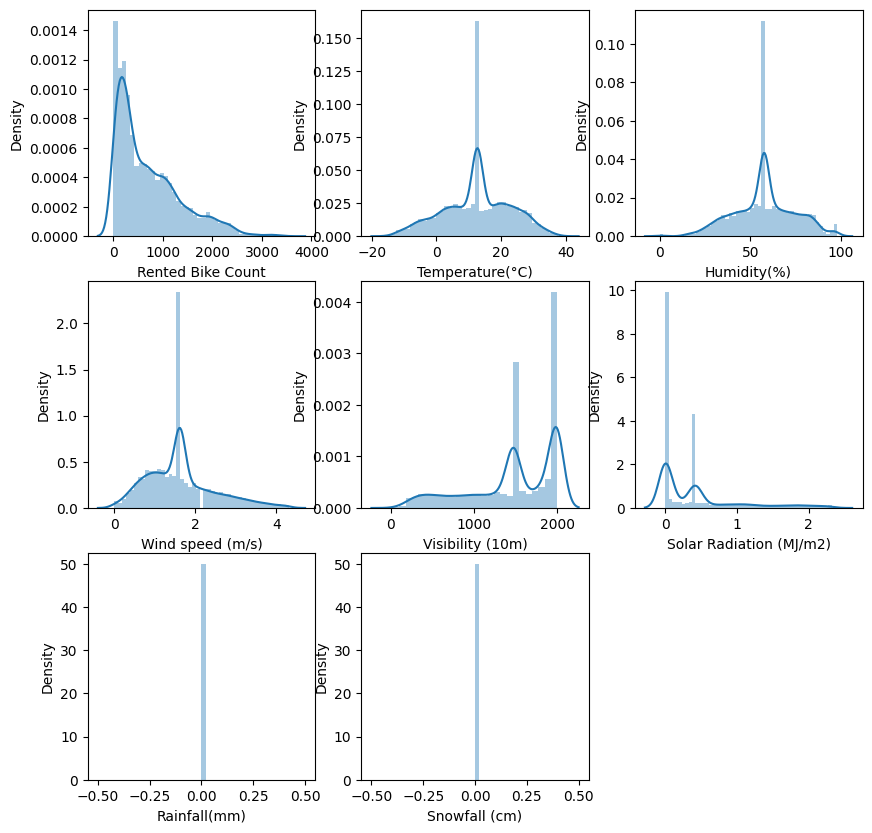

In [42]:
# checking the distribution
plt.figure(figsize=(10,10))
for index,item in enumerate(numerical_columns):
  plt.subplot(3,3,index+1)
  sns.distplot(df[item])

In [43]:
# creating a dataframe containing the count of bikes rented in different temperature

df_temp = pd.DataFrame(df.groupby('Temperature(°C)')['Rented Bike Count'].sum())
df_temp.reset_index(inplace=True)

<ipython-input-44-39f8d80094e7>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_temp['Temperature(°C)'])


<Axes: xlabel='Temperature(°C)', ylabel='Density'>

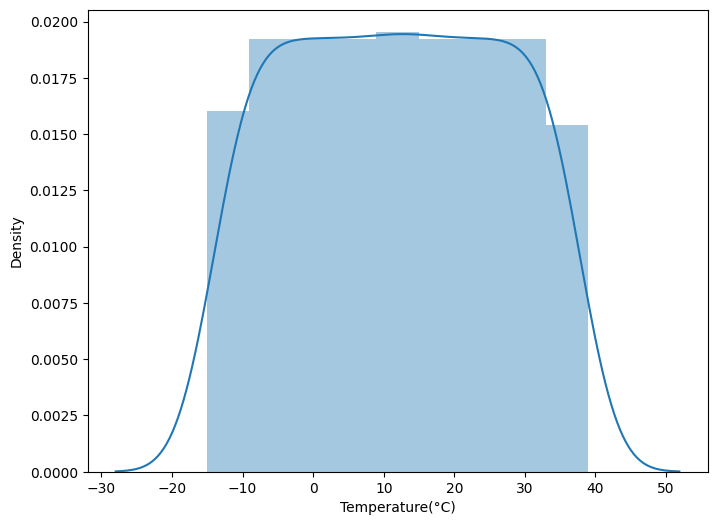

In [44]:
# plot showing distribution of bike rentals according to temperature intensity

plt.figure(figsize=(8,6))
sns.distplot(df_temp['Temperature(°C)'])


Above plot shows that people tend to rent bikes when the temperature is between -5 to 25 degrees.

In [45]:
# creating a dataframe containing the count of bikes rented in differant visibility ranges

df_visi = pd.DataFrame(df.groupby('Visibility (10m)')['Rented Bike Count'].sum())
df_visi.reset_index(inplace=True)

<ipython-input-46-0ce137df97d2>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_visi['Visibility (10m)'])


<Axes: xlabel='Visibility (10m)', ylabel='Density'>

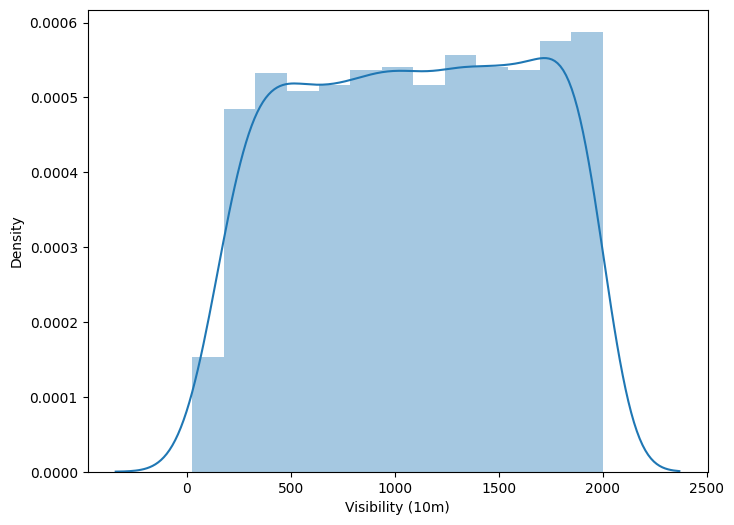

In [46]:
plt.figure(figsize=(8,6))
sns.distplot(df_visi['Visibility (10m)'])

Above plot shows that people tend to rent bikes when the visibility is between 300 to 1700.

**Label Encoding**

In [47]:
# creating dummy variables for categorical feature --> Seasons, month, DayOfWeek, year, fuctioning day, holiday

seasons = pd.get_dummies(df['Seasons'])

working_day = pd.get_dummies(df['Holiday'])

F_day = pd.get_dummies(df['Functioning Day'])

month = pd.get_dummies(df['month'])

week_day = pd.get_dummies(df['week'])



In [48]:
df = pd.concat([df,seasons,working_day,F_day,month,week_day],axis=1)


In [49]:
# checking the data dummy variable is created or not

df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),...,5,6,7,8,9,10,11,12,weekday,weekend
0,01/12/2017,254,0,-5.2,37.0,2.2,2000.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,1,0
1,01/12/2017,204,1,-5.5,38.0,0.8,2000.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,1,0
2,01/12/2017,173,2,-6.0,39.0,1.0,2000.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,1,0
3,01/12/2017,107,3,-6.2,40.0,0.9,2000.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,1,0
4,01/12/2017,78,4,-6.0,36.0,2.3,2000.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,1,0


In [50]:
## dropping columns for which dummy variables were created

df.drop(['Seasons','Holiday','Functioning Day','week','month'],axis=1,inplace=True)


In [51]:
df.drop(['Date'],axis=1,inplace=True) # droping date because we already extract the date from the data


**checking multicollinearity**

In [52]:
# function to calculate Multicollinearity

# checking the vif
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = df


# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
vif_data['VIF'] = round(vif_data['VIF'],2)


print(vif_data)

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


                    feature   VIF
0         Rented Bike Count  2.22
1                      Hour  1.41
2           Temperature(°C)  3.97
3               Humidity(%)  2.33
4          Wind speed (m/s)  1.29
5          Visibility (10m)  1.75
6   Solar Radiation (MJ/m2)  1.62
7              Rainfall(mm)   NaN
8             Snowfall (cm)   NaN
9                    Autumn   inf
10                   Spring   inf
11                   Summer   inf
12                   Winter   inf
13               No Holiday  1.05
14                       No   inf
15                      Yes   inf
16                        1   inf
17                        2   inf
18                        3   inf
19                        4   inf
20                        5   inf
21                        6   inf
22                        7   inf
23                        8   inf
24                        9   inf
25                       10   inf
26                       11   inf
27                       12   inf
28            

In [53]:
df=df.drop(['Rainfall(mm)','Snowfall (cm)'],axis=1)

**Regression plot**

In [54]:
numerical_columns=['Rented Bike Count','Temperature(°C)','Humidity(%)',	'Wind speed (m/s)',	'Visibility (10m)',	'Solar Radiation (MJ/m2)'	]

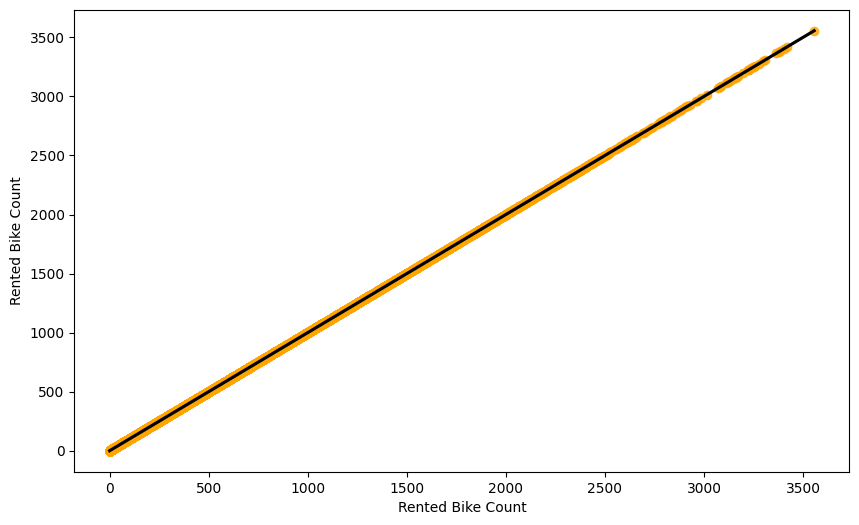

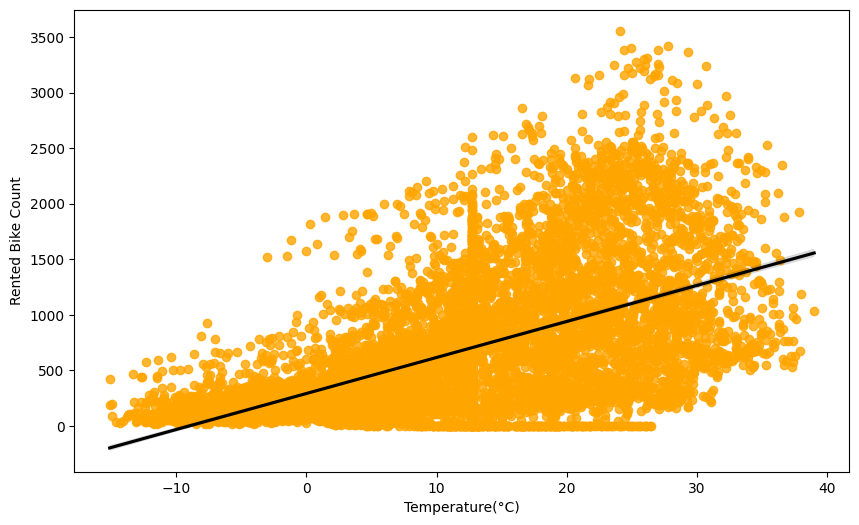

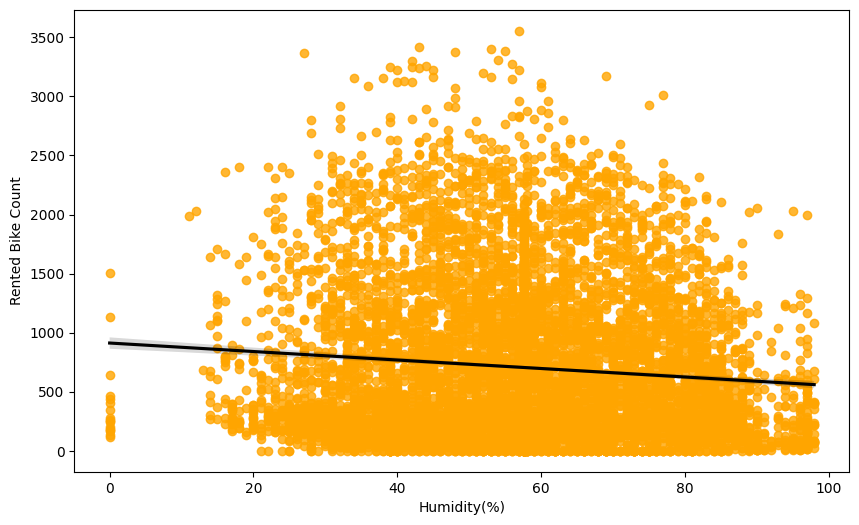

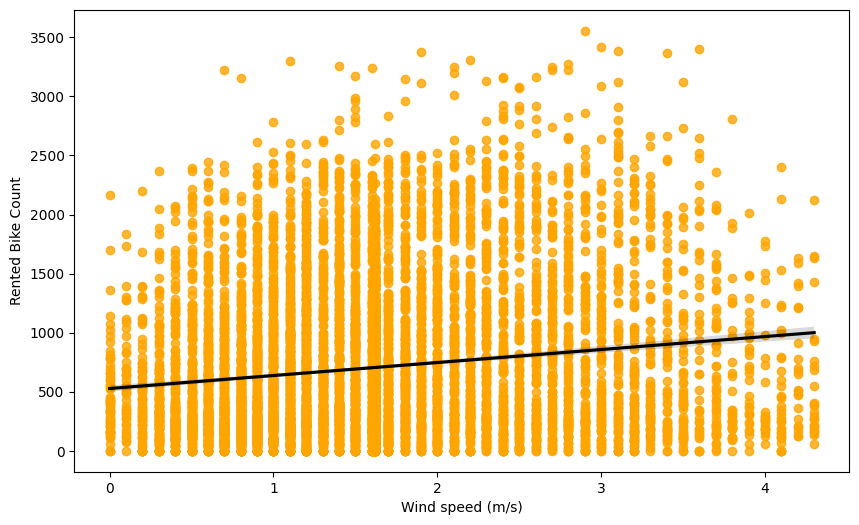

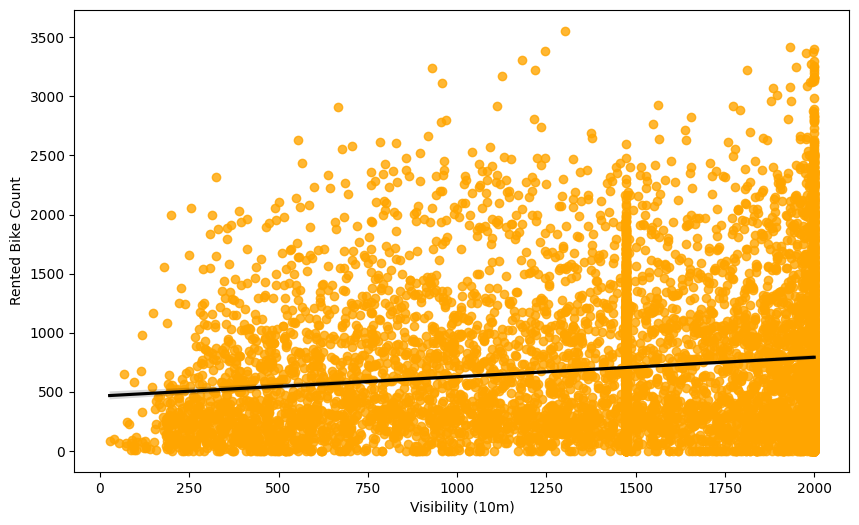

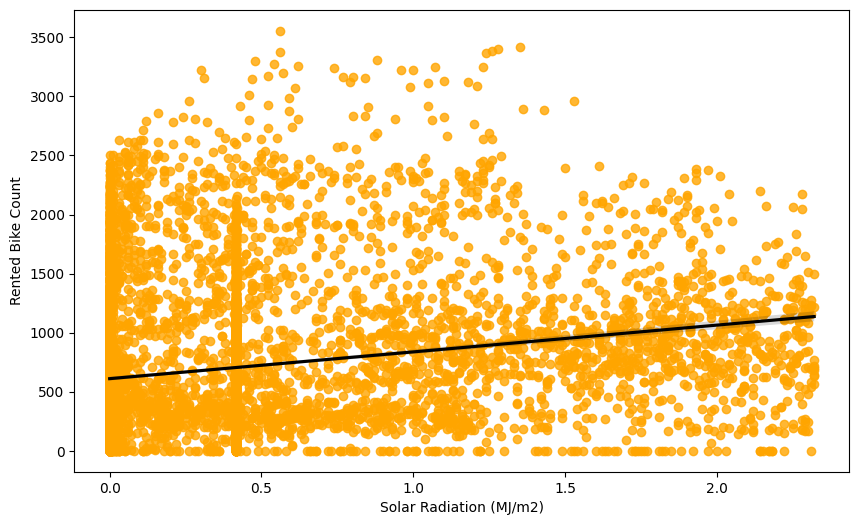

In [55]:
#printing the regression plot for all the numerical features
for col in numerical_columns:
  fig,ax=plt.subplots(figsize=(10,6))
  sns.regplot(x=df[col],y=df['Rented Bike Count'],scatter_kws={"color": 'orange'}, line_kws={"color": "black"})


Temperature,solar radiation,windspeed,visibility  are positively related to target variable ,the rented bike count increases with increase of these features

In [56]:
#Assign the value in X and Y
X = df.drop(columns=['Rented Bike Count'], axis=1)
y = np.sqrt(df['Rented Bike Count'])

In [57]:
X.head()



,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Autumn,Spring,Summer,Winter,...,5,6,7,8,9,10,11,12,weekday,weekend
0,0,-5.2,37.0,2.2,2000.0,0.0,0,0,0,1,...,0,0,0,0,0,0,0,1,1,0
1,1,-5.5,38.0,0.8,2000.0,0.0,0,0,0,1,...,0,0,0,0,0,0,0,1,1,0
2,2,-6.0,39.0,1.0,2000.0,0.0,0,0,0,1,...,0,0,0,0,0,0,0,1,1,0
3,3,-6.2,40.0,0.9,2000.0,0.0,0,0,0,1,...,0,0,0,0,0,0,0,1,1,0
4,4,-6.0,36.0,2.3,2000.0,0.0,0,0,0,1,...,0,0,0,0,0,0,0,1,1,0


In [58]:
y.head()

0    15.937377
1    14.282857
2    13.152946
3    10.344080
4     8.831761
Name: Rented Bike Count, dtype: float64

In [59]:
# Assuming X is your input DataFrame
X.columns = X.columns.astype(str)

In [60]:
#Creat test and train data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=0)
print(X_train.shape)
print(X_test.shape)

(6570, 27)
(2190, 27)


In [61]:
# standardizing the independent variables
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

# Linear regression model

In [62]:
#import the packages
from sklearn.linear_model import LinearRegression
reg= LinearRegression().fit(X_train, y_train)

In [63]:
#check the score
reg.score(X_train, y_train)

0.603032589825012

In [64]:
#check the coefficeint
reg.coef_

array([ 3.75003221e+00,  4.07715815e+00, -2.07984877e+00,  3.80877368e-01,
       -8.09253612e-02, -1.48553598e-01, -2.80663822e+13,  1.70714552e+13,
       -1.85708860e+12,  6.13735841e+12,  6.98221636e-01, -1.43286564e+13,
       -1.43286564e+13, -1.98188847e+11, -1.87511556e+11, -7.16970901e+12,
       -7.12841259e+12, -7.18144504e+12,  4.85630353e+12,  4.94666214e+12,
        4.93041008e+12,  2.13284737e+13,  2.18150688e+13,  2.18327916e+13,
       -1.96600055e+11, -9.21889586e+12, -9.21889586e+12])

In [65]:
#get the X_train and X-test value
y_pred_train=reg.predict(X_train)
y_pred_test=reg.predict(X_test)

In [66]:
y_pred_test

array([ 1.86572387e+11, -2.84534894e+12,  9.60839087e+10, ...,
       -4.11052586e+11,  4.85731018e+12, -1.72901634e+11])

In [67]:
#import the packages
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
#calculate MSE
MSE_lr= mean_squared_error((y_train), (y_pred_train))
print("MSE :",MSE_lr)

#calculate RMSE
RMSE_lr=np.sqrt(MSE_lr)
print("RMSE :",RMSE_lr)


#calculate MAE
MAE_lr= mean_absolute_error(y_train, y_pred_train)
print("MAE :",MAE_lr)



#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_lr= r2_score(y_train, y_pred_train)
print("R2 :",r2_lr)
Adjusted_R2_lr = (1-(1-r2_score(y_train, y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

print("Adjusted R2 :",Adjusted_R2_lr)

MSE : 61.12928095385197
RMSE : 7.818521660381326
MAE : 5.911585762918718
R2 : 0.603032589825012
Adjusted R2 : 0.5980750874777758


# linear regression with L2 regularization

In [68]:
#import the packages
from sklearn.linear_model import Ridge

ridge= Ridge(alpha=0.1)

In [69]:
#FIT THE MODEL
ridge.fit(X_train,y_train)

Ridge(alpha=0.1)

In [70]:
#check the score
ridge.score(X_train, y_train)

0.6030365859024547

In [71]:
#get the X_train and X-test value
y_pred_train_ridge=ridge.predict(X_train)
y_pred_test_ridge=ridge.predict(X_test)

In [72]:
# evaluating metrics
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE  = mean_squared_error(y_test,y_pred_test_ridge)
print("MSE :" , MSE)
#calculate RMSE
RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)
#calculate r2 and adjusted r2
r2_ridge_test = r2_score(y_test,y_pred_test_ridge)
print("R2 :" ,r2_ridge_test)
print("Adjusted R2 : ",1-(1-r2_score(y_test,y_pred_test_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))


MSE : 60.833847122723995
RMSE : 7.799605574817485
R2 : 0.6148937632653052
Adjusted R2 :  0.6100843884309681


# linear regression with elastic net

In [73]:
#import the packages
from sklearn.linear_model import ElasticNet
#a * L1 + b * L2
#alpha = a + b and l1_ratio = a / (a + b)
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)

In [74]:
#FIT THE MODEL
elasticnet.fit(X_train,y_train)

ElasticNet(alpha=0.1)

In [75]:
#check the score
elasticnet.score(X_train, y_train)

0.6014721692250583

In [76]:
#get the X_train and X-test value
y_pred_train_en=elasticnet.predict(X_train)
y_pred_test_en=elasticnet.predict(X_test)

In [77]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_e= mean_squared_error((y_train), (y_pred_train_en))
print("MSE :",MSE_e)

#calculate RMSE
RMSE_e=np.sqrt(MSE_e)
print("RMSE :",RMSE_e)


#calculate MAE
MAE_e= mean_absolute_error(y_train, y_pred_train_en)
print("MAE :",MAE_e)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_e= r2_score(y_train, y_pred_train_en)
print("R2 :",r2_e)
Adjusted_R2_e=(1-(1-r2_score(y_train, y_pred_train_en))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_en))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


MSE : 61.369571181250464
RMSE : 7.8338733191985215
MAE : 5.93382066577593
R2 : 0.6014721692250583
Adjusted R2 : 0.5964951796640392


# **decision tree**

In [78]:
# training model

from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [79]:
Y_pred_train =regressor.predict(X_train)
Y_pred_train

array([19.55740252, 29.37807057, 11.04536102, ..., 28.25295474,
       20.02498439, 22.64950331])

In [80]:
Y_pred_test = regressor.predict(X_test)
Y_pred_test

array([19.79898987, 24.49489743, 14.62873884, ..., 35.02727296,
        0.        , 20.85281734])

In [81]:
r2_score(Y_pred_train,y_train)

0.9565092151304044

In [82]:
DT = r2_score(Y_pred_test,y_test)
DT

0.7619882672759375

**decision tree with gridsearch cv**

In [83]:
# Tunning the hyper parameters with GridSearchCV
param = {'max_depth' : [1,4,5,6,7,10,15,20,8]}

regressor_gs_cv =GridSearchCV(regressor ,param,scoring='r2',cv=5)
regressor_gs_cv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': [1, 4, 5, 6, 7, 10, 15, 20, 8]},
             scoring='r2')

In [84]:
#looking at the best estimator
regressor_gs_cv.best_estimator_

DecisionTreeRegressor(max_depth=10, random_state=0)

In [85]:
#checking the score with best parameters
DT_with_cv = regressor_gs_cv.score(X_test,y_test)
DT_with_cv

0.8013257980814106

In [86]:
print(f'The r2 score of decision tree is {r2_score(Y_pred_test,y_test)}')

print(f'the r2 score of decision tree with hyper perameteres tunning is {regressor_gs_cv.score(X_test,y_test)} ')


The r2 score of decision tree is 0.7619882672759375
the r2 score of decision tree with hyper perameteres tunning is 0.8013257980814106 


# Random ForestRegressor with GridSearchCV

In [87]:
from sklearn.ensemble import RandomForestRegressor

In [88]:

#implementing the model
rf_reg = RandomForestRegressor(n_estimators = 1000, random_state=5)
#training the model
rf_reg.fit(X_train, y_train)
#defining the predicted variables
pred_train = rf_reg.predict(X_train)
pred_test = rf_reg.predict(X_test)
MSE_train = mean_squared_error(y_train, pred_train)
print(f'MSE= {MSE_train}')

RMSE_train = np.sqrt(MSE_train)
print(f'RMSE= {RMSE_train}')

R2_Score_train = r2_score(y_train, pred_train)
print(f'R2_Score_train= {R2_Score_train}')

MSE_test = mean_squared_error(y_test, pred_test)
print(f'MSE= {MSE_test}')

RMSE_test = np.sqrt(MSE_test)
print(f'RMSE= {RMSE_test}')
R2_Score_test = r2_score(y_test, pred_test)
print(f'R2_Score_test= {R2_Score_test}')

MSE= 7.548469131956553
RMSE= 2.747447748721812
R2_Score_train= 0.9509809996888273
MSE= 19.900384576287564
RMSE= 4.460984709264039
R2_Score_test= 0.8740214111679199


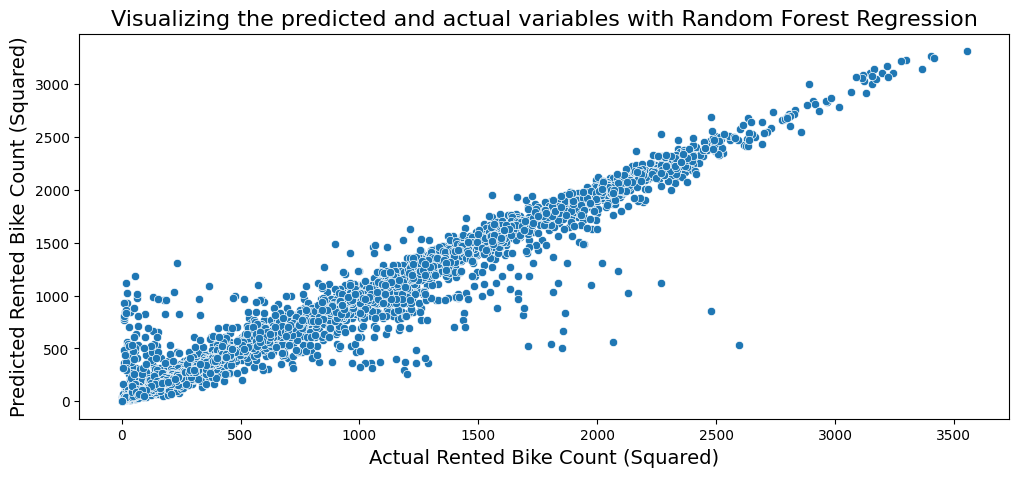

In [89]:
#ploting the outputs

plt.figure(figsize=(12, 5))
y_train_square = y_train * y_train
pred_train_square = pred_train * pred_train

sns.scatterplot(x=y_train_square, y=pred_train_square)
plt.title('Visualizing the predicted and actual variables with Random Forest Regression', size=16)
plt.xlabel('Actual Rented Bike Count (Squared)', size=14)
plt.ylabel('Predicted Rented Bike Count (Squared)', size=14)
plt.show()


# **SVR using grid searchcv**


In [90]:
from sklearn.svm import SVR

In [91]:
# selecting the values of SVR
param = {'C' : [1,5,10],'degree' : [3,8],'coef0' : [0.01,10,0.5],'gamma' : ('auto','scale')},


In [92]:
#train the model
modelsvr = SVR(kernel='rbf')
grids = GridSearchCV(modelsvr,param,cv=3)
grids.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=SVR(),
             param_grid=({'C': [1, 5, 10], 'coef0': [0.01, 10, 0.5],
                          'degree': [3, 8], 'gamma': ('auto', 'scale')},))

In [93]:
# predicting for both train and test
y_pred_train3=grids.predict(X_train)
y_pred_test3=grids.predict(X_test)

In [94]:
# finding each of the metrics for training set

print('The MAE of training set = ',mean_absolute_error(y_train, y_pred_train3))
print('The MSE of training set = ',mean_squared_error(y_train, y_pred_train3))
print('The R2_score of training set = ',r2_score(y_train, y_pred_train3))

The MAE of training set =  4.312974309168603
The MSE of training set =  44.52588081838082
The R2_score of training set =  0.7108534025195493


In [95]:
# finding each metrics for test set
svr = r2_score(y_test, y_pred_test3)
print('The MAE of test set = ',mean_absolute_error(y_test, y_pred_test3))
print('The MSE of test set = ',mean_squared_error(y_test, y_pred_test3))
print('The R2_score of test set = ',r2_score(y_test, y_pred_test3))

The MAE of test set =  4.6745535870500605
The MSE of test set =  46.854036819584934
The R2_score of test set =  0.7033923933987224


# Gradient Boosting Regressor with GridSearchCV

In [96]:
# Number of trees
n_estimators = [50,80,100]

# Maximum depth of trees
max_depth = [4,6,8]

# Minimum number of samples required to split a node
min_samples_split = [50,100,150]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

# HYperparameter Grid
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [97]:
param_dict

{'n_estimators': [50, 80, 100],
 'max_depth': [4, 6, 8],
 'min_samples_split': [50, 100, 150],
 'min_samples_leaf': [40, 50]}

In [98]:
## Importing Gradient Boosting Regressor
from sklearn.model_selection import GridSearchCV
## Create an instance of the GradientBoostingRegressor
gb_model = GradientBoostingRegressor()

# Grid search
gb_grid = GridSearchCV(estimator=gb_model,
                       param_grid = param_dict,
                       cv = 5, verbose=2)

gb_model = gb_grid.fit(X_train,y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.4s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.4s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.4s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.4s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.4s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.6s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.6s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.6s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.6s
[CV] END max_depth=4, min_sam

In [99]:
gb_model.best_estimator_

GradientBoostingRegressor(max_depth=8, min_samples_leaf=40,
                          min_samples_split=50)

In [100]:
gb_optimal_model = gb_model.best_estimator_

In [101]:
gb_model.best_params_

{'max_depth': 8,
 'min_samples_leaf': 40,
 'min_samples_split': 50,
 'n_estimators': 100}

In [102]:
# Making predictions on train and test data

y_pred_train_g_g = gb_optimal_model.predict(X_train)
y_pred_g_g= gb_optimal_model.predict(X_test)

In [103]:
r2_score(y_train, y_pred_train_g_g)

0.9106108001677612

In [104]:
gradient=r2_score(y_test, y_pred_g_g)
gradient

0.8693942502974663

Text(0.5, 0, 'Actual Values')

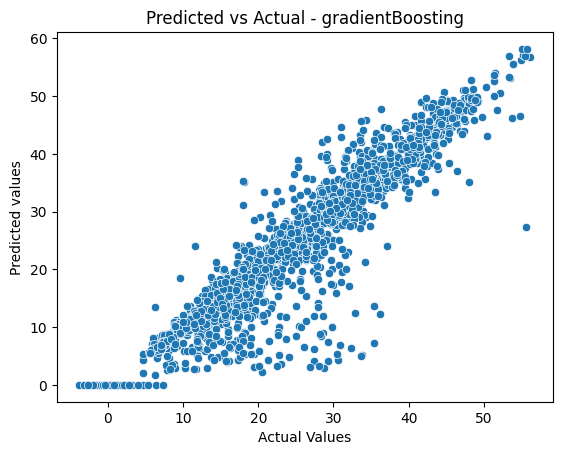

In [105]:
#visualizing the predictions
sns.scatterplot(x=y_pred_g_g,y=y_test)
plt.title('Predicted vs Actual - gradientBoosting')
plt.ylabel('Predicted values')
plt.xlabel('Actual Values')

**compaing the model with r2 value**

In [106]:
models= ['Ridge_model','elasticnet','Decision_Tree_model','Decision_Tree_model_gridcv','random forest','SVR','gradient']
R2_value= [r2_ridge_test,Adjusted_R2_e,DT,DT_with_cv,R2_Score_test,svr,gradient]
compare_models = pd.DataFrame([R2_value],columns=models,index =['r2_value'])
compare_models

,Ridge_model,elasticnet,Decision_Tree_model,Decision_Tree_model_gridcv,random forest,SVR,gradient
r2_value,0.614894,0.596495,0.761988,0.801326,0.874021,0.703392,0.869394
